In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../resources/datasets/AmazonSalesData.csv')
df.drop(columns=['Sales Channel', 'Order Priority', 'Order ID'], inplace=True)
df

,Region,Country,Item Type,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,5/28/2010,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,8/22/2012,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,5/2/2014,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,6/20/2014,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,2/1/2013,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,7/26/2011,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,11/11/2011,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,6/1/2016,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,7/30/2015,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         100 non-null    object 
 1   Country        100 non-null    object 
 2   Item Type      100 non-null    object 
 3   Order Date     100 non-null    object 
 4   Ship Date      100 non-null    object 
 5   Units Sold     100 non-null    int64  
 6   Unit Price     100 non-null    float64
 7   Unit Cost      100 non-null    float64
 8   Total Revenue  100 non-null    float64
 9   Total Cost     100 non-null    float64
 10  Total Profit   100 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 8.7+ KB


In [4]:
df.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [5]:
df.isnull().sum()

Region           0
Country          0
Item Type        0
Order Date       0
Ship Date        0
Units Sold       0
Unit Price       0
Unit Cost        0
Total Revenue    0
Total Cost       0
Total Profit     0
dtype: int64

In [6]:
num_cols = df.select_dtypes(include='number').columns.to_list()
cat_cols = df.select_dtypes(include='object').columns.to_list()

print(num_cols)
print(cat_cols)

['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
['Region', 'Country', 'Item Type', 'Order Date', 'Ship Date']


In [7]:
df[num_cols].corr()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


Text(0.5, 1.0, 'Nilai Kolerasi DS Amazon Sales')

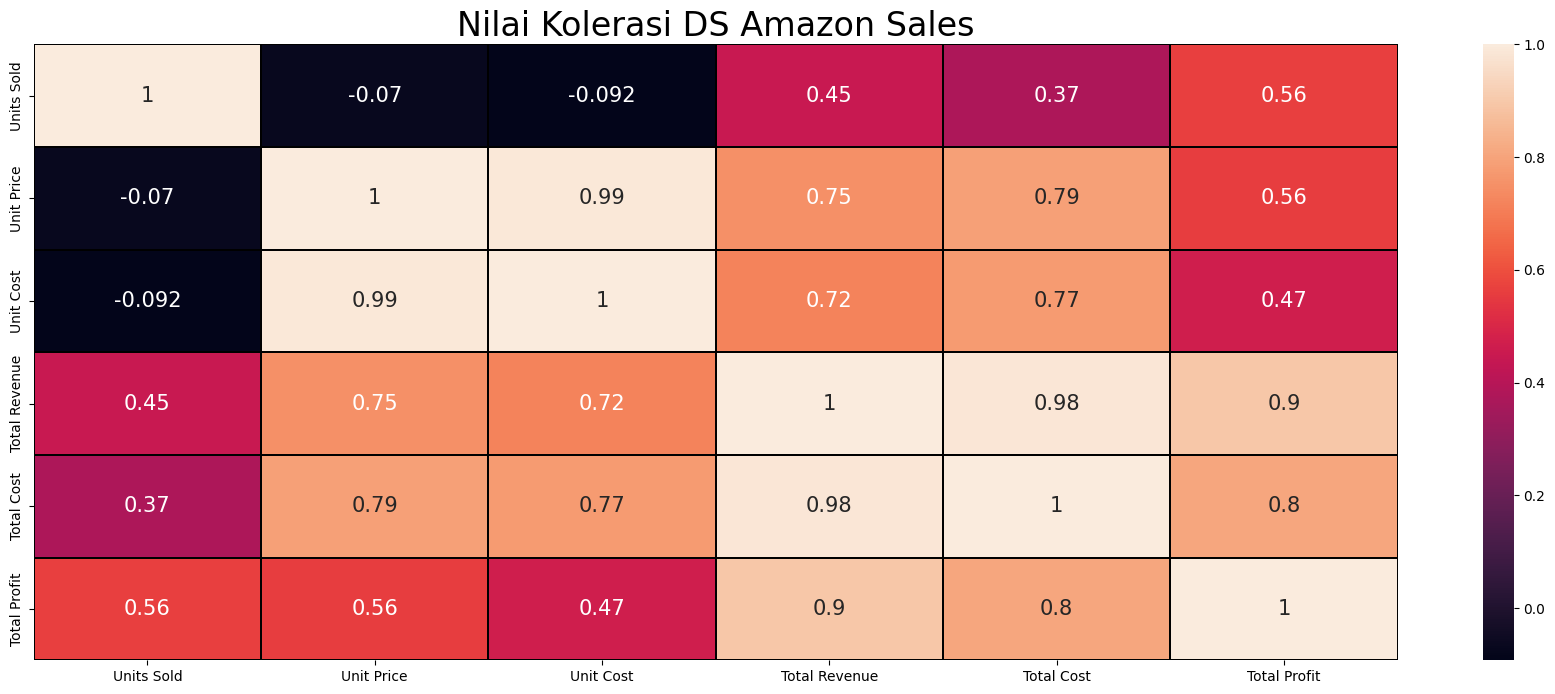

In [8]:
plt.subplots(figsize=(22,8))
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=1.3, linecolor="black", annot_kws=dict(fontsize=15.1))
plt.title("Nilai Kolerasi DS Amazon Sales", fontdict=dict({"fontsize": 24}))

In [9]:
# Nyoba nyoba aja sih wkwk

# Menghitung korelasi
correlation_matrix = df[num_cols].corr()
correlation_with_type = correlation_matrix['Total Profit'].sort_values(ascending=False)
top_features = correlation_with_type.index[1:6]

# Data untuk plot
df_temp = pd.DataFrame({
    'Attribute': top_features,
    'Correlation': [round(correlation_matrix[feature]['Total Profit'] * 100, 2) for feature in top_features]
})


C:\Users\User\AppData\Local\Temp\ipykernel_9756\307551887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.barplot(y=df_temp.Attribute, x=df_temp.Correlation,


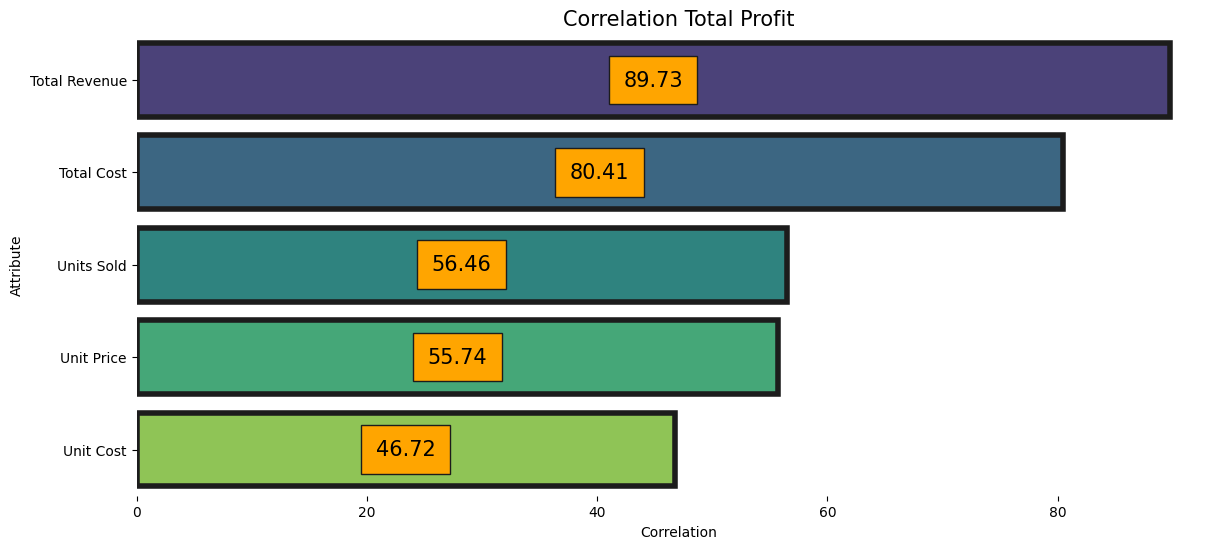

In [10]:
plt.subplots(figsize=(14, 6))

bp = sns.barplot(y=df_temp.Attribute, x=df_temp.Correlation, 
            edgecolor='#1c1c1c', linewidth=4, palette='viridis')
bp.set_title("Correlation Total Profit", fontsize=15)

for container in bp.containers:
    plt.bar_label(container, label_type='center', size=15, color='black', rotation=0,
                bbox={'pad': 10.4, 'facecolor': 'orange', 'edgecolor': '#1c1c1c', 'linewidth': 1, 'alpha': 1})

sns.despine(left=True, bottom=True)
plt.show()

<Axes: xlabel='Order Date'>

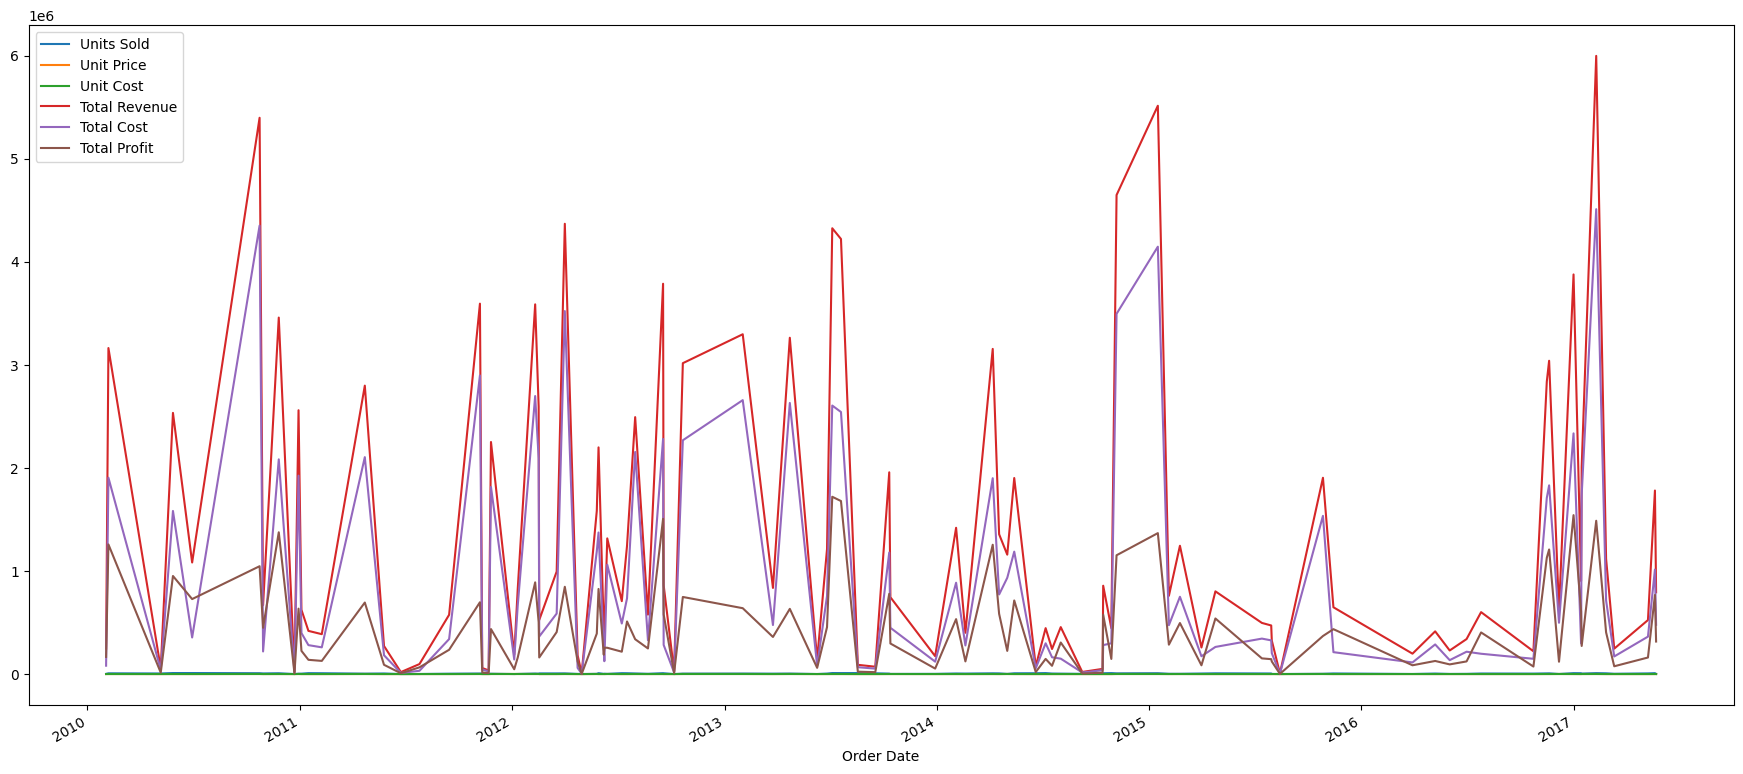

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

df2 = df[num_cols + ["Order Date"]].groupby(by="Order Date").mean().sort_index()

df2.plot(figsize=(22,10))

In [12]:
df2

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order Date,,,,,,
2010-02-02,2269.0,109.28,35.84,247956.32,81320.96,166635.36
2010-02-06,7234.0,437.20,263.33,3162704.80,1904929.22,1257775.58
2010-05-07,5822.0,9.33,6.92,54319.26,40288.24,14031.02
2010-05-28,9925.0,255.28,159.42,2533654.00,1582243.50,951410.50
2010-06-30,9905.0,109.28,35.84,1082418.40,354995.20,727423.20
...,...,...,...,...,...,...
2017-02-25,7327.0,152.58,97.44,1117953.66,713942.88,404010.78
2017-03-11,3015.0,81.73,56.67,246415.95,170860.05,75555.90
2017-05-08,6409.0,81.73,56.67,523807.57,363198.03,160609.54


<Axes: >

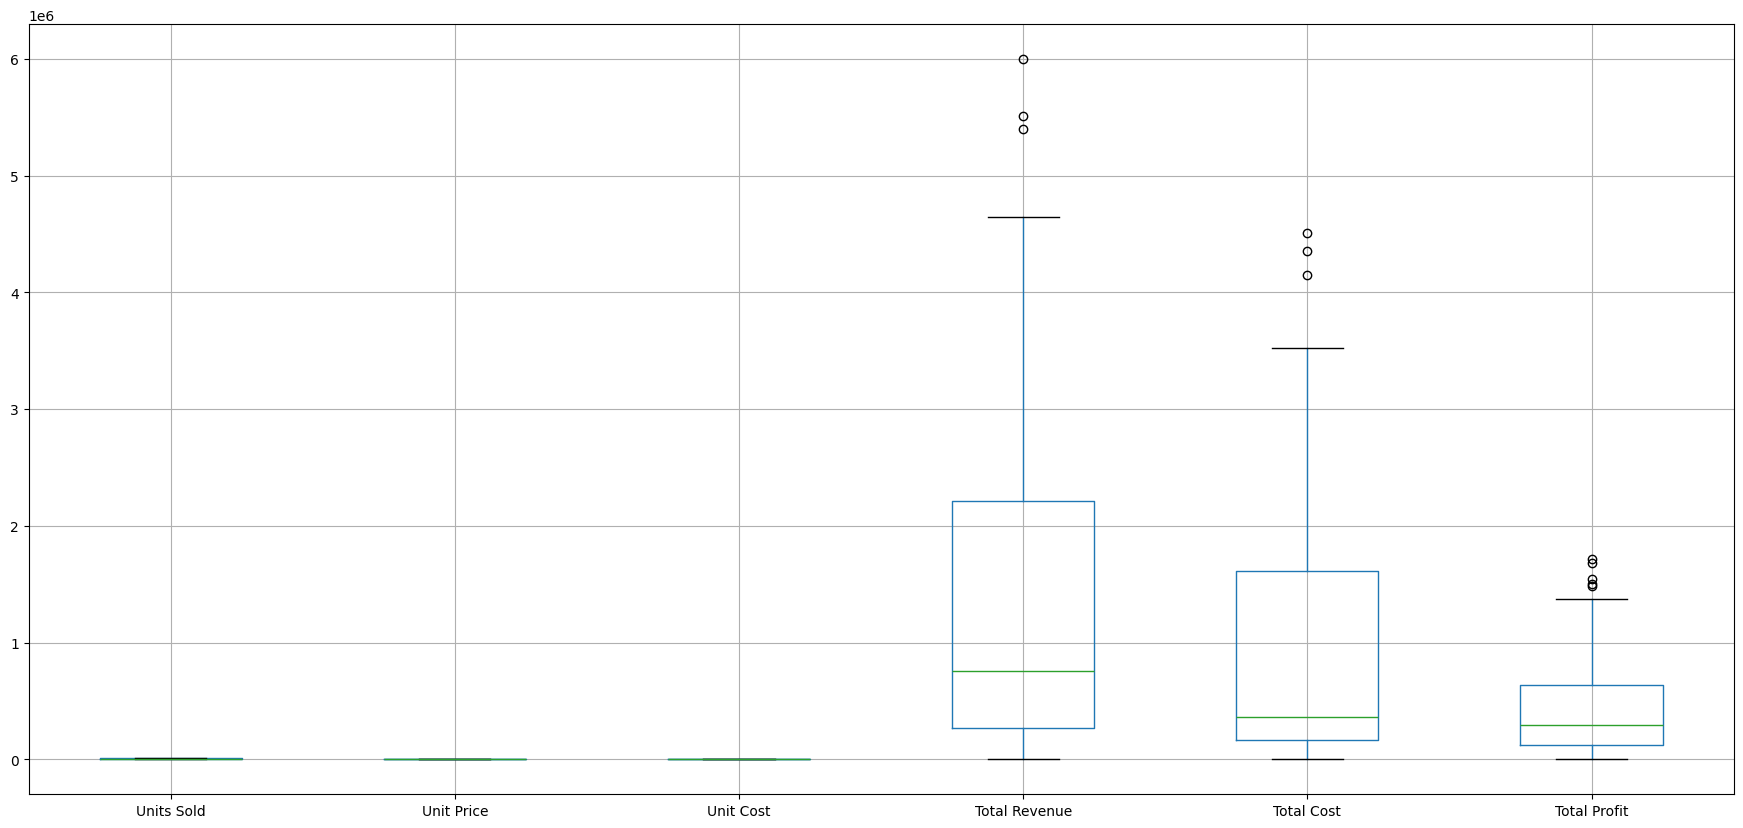

In [13]:
df2.boxplot(figsize=(22, 10))